In [29]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
from iosubdomains import Variable

In [93]:
exp = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
time = exp.time/3600/24
r_lim = 0.35
z_lim = 0.5

In [94]:
variables = exp.read_vars(['x', 'y', 'z'])

x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x/exp.params['Lx']-0.5, z/exp.params['Lz'])
XY, YX = np.meshgrid(x/exp.params['Lx']-0.5, y/exp.params['Ly']-0.5)

In [95]:
w = Variable(exp.template, 'w')
b = Variable(exp.template, 'b')

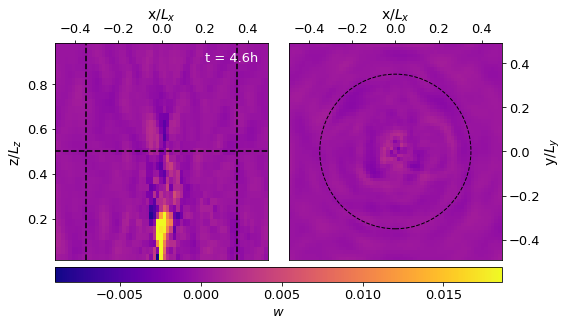

In [99]:
n = 220
maxx = 1.86e-2
minn = -0.9e-2
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

z_plume_idx = diag.find_z_plume(momentum_flux[n], 0.1)
M_max_idx = diag.find_z_plume(momentum_flux[n], 1) 

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[1, 1], 'wspace': 0.1})
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, w[n, :, 32, :]/exp.params['Lz'], cmap='plasma',
                     vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.2, 0.9, f't = {time[n]:0.1f}h', color='w')

ax2.pcolormesh(XY, YX, w[n, new_nz, :, :]/exp.params['Lz'], cmap='plasma', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax2.add_artist(draw_circle)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
# ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
ax_cbar = fig.add_axes([p0[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$w$')